# connection to database

In [117]:
import numpy as np
import psycopg2
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt #for plotting graphs
import matplotlib
%matplotlib inline

# Connection parameters, 
param_dic = {
    "host"      : "localhost",
    "database"  : "dvdrental",
    "user"      : "postgres",
    "password"  : "admin"
}
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn



# Getting dataframe

In [118]:
def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

# Extracting data from database

In [119]:
conn = connect(param_dic)
column_names = ["actor_id", "first_name", "last_name", "last_update"]
# Execute the "SELECT *" query
df1 = postgresql_to_dataframe(conn, "select * from actor", column_names)
df1

Connecting to the PostgreSQL database...
Connection successful


,actor_id,first_name,last_name,last_update
0,1,Penelope,Guiness,2013-05-26 14:47:57.620
1,2,Nick,Wahlberg,2013-05-26 14:47:57.620
2,3,Ed,Chase,2013-05-26 14:47:57.620
3,4,Jennifer,Davis,2013-05-26 14:47:57.620
4,5,Johnny,Lollobrigida,2013-05-26 14:47:57.620
...,...,...,...,...
195,196,Bela,Walken,2013-05-26 14:47:57.620
196,197,Reese,West,2013-05-26 14:47:57.620
197,198,Mary,Keitel,2013-05-26 14:47:57.620
198,199,Julia,Fawcett,2013-05-26 14:47:57.620


In [120]:
conn = connect(param_dic)
column_names = ["category_id","name","last_update"]
# Execute the "SELECT *" query
df2 = postgresql_to_dataframe(conn,"SELECT * from category", column_names)
df2

Connecting to the PostgreSQL database...
Connection successful


,category_id,name,last_update
0,1,Action,2006-02-15 09:46:27
1,2,Animation,2006-02-15 09:46:27
2,3,Children,2006-02-15 09:46:27
3,4,Classics,2006-02-15 09:46:27
4,5,Comedy,2006-02-15 09:46:27
5,6,Documentary,2006-02-15 09:46:27
6,7,Drama,2006-02-15 09:46:27
7,8,Family,2006-02-15 09:46:27
8,9,Foreign,2006-02-15 09:46:27
9,10,Games,2006-02-15 09:46:27


# Top and Total_rent demand (data extraction from database)

In [121]:
conn = connect(param_dic)
column_names = ["Genre", "Total_rent demand"]
# Execute the "SELECT *" query
df4 = postgresql_to_dataframe(conn,"SELECT c.name AS Genre, count(cu.customer_id) AS Total_rent_demand FROM category c JOIN film_category fc USING(category_id) JOIN film f USING(film_id) JOIN inventory i USING(film_id) JOIN rental r USING(inventory_id) JOIN customer cu USING(customer_id) GROUP BY 1 ORDER BY 2 DESC", column_names)
df4

Connecting to the PostgreSQL database...
Connection successful


,Genre,Total_rent demand
0,Sports,1179
1,Animation,1166
2,Action,1112
3,Sci-Fi,1101
4,Family,1096
5,Drama,1060
6,Documentary,1050
7,Foreign,1033
8,Games,969
9,Children,945


In [122]:
conn = connect(param_dic)
column_names = ["Genre", "Total_sales"]
# Execute the "SELECT *" query
df5 = postgresql_to_dataframe(conn,"SELECT c.name AS Genre, SUM(p.amount) AS total_sales FROM category c JOIN film_category fc USING(category_id) JOIN film f USING(film_id) JOIN inventory i USING(film_id) JOIN rental r USING(inventory_id) JOIN payment p USING(rental_id) GROUP BY 1 ORDER BY 2 DESC", column_names)
df5

Connecting to the PostgreSQL database...
Connection successful


,Genre,Total_sales
0,Sports,4892.19
1,Sci-Fi,4336.01
2,Animation,4245.31
3,Drama,4118.46
4,Comedy,4002.48
5,New,3966.38
6,Action,3951.84
7,Foreign,3934.47
8,Games,3922.18
9,Family,3830.15


# Top and least in demand Genre, and their total sales¶

In [123]:
conn = connect(param_dic)
column_names = ["Genre", "Total_rent demand","Total_sales"]
# Execute the "SELECT *" query
df6 = postgresql_to_dataframe(conn,"SELECT c.name AS Genre, count(cu.customer_id) AS Total_rent_demand, SUM(p.amount) AS Total_sales FROM category c JOIN film_category fc USING(category_id) JOIN film f USING(film_id) JOIN inventory i USING(film_id) JOIN rental r USING(inventory_id) JOIN customer cu USING(customer_id) JOIN payment p USING(rental_id) GROUP BY 1 ORDER BY 2 DESC", column_names)
df6

Connecting to the PostgreSQL database...
Connection successful


,Genre,Total_rent demand,Total_sales
0,Sports,1081,4892.19
1,Animation,1065,4245.31
2,Action,1013,3951.84
3,Sci-Fi,998,4336.01
4,Family,988,3830.15
5,Foreign,953,3934.47
6,Drama,953,4118.46
7,Documentary,937,3749.65
8,Games,884,3922.18
9,New,864,3966.38


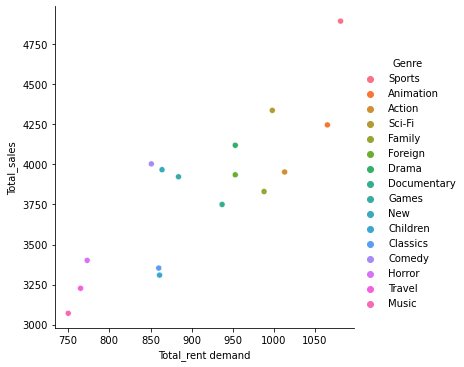

In [124]:
sns.relplot(x="Total_rent demand", y="Total_sales", hue = "Genre", data = df6)

# Distinct user rented each Genre

In [125]:
conn = connect(param_dic)
column_names = ["Genre", "Total_rentby_distinct_user",]
# Execute the "SELECT *" query
df7 = postgresql_to_dataframe(conn,"SELECT c.name AS Genre, count(Distinct cu.customer_id) AS Total_rentby_distinct_user FROM category c JOIN film_category fc USING(category_id) JOIN film f USING(film_id) JOIN inventory i USING(film_id) JOIN rental r USING(inventory_id) JOIN customer cu USING(customer_id) GROUP BY 1 ORDER BY 2 DESC", column_names)
df7

Connecting to the PostgreSQL database...
Connection successful


,Genre,Total_rentby_distinct_user
0,Sports,519
1,Action,510
2,Sci-Fi,507
3,Family,501
4,Drama,501
5,Animation,500
6,Comedy,495
7,Foreign,493
8,Documentary,483
9,Children,482


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_rentby_distinct_user', ylabel='Density'>

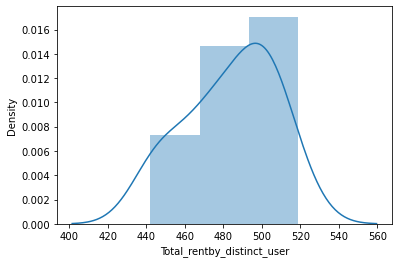

In [126]:
sns.distplot(df7.Total_rentby_distinct_user)

# Average rental rate for each genre

In [127]:
conn = connect(param_dic)
column_names = ["Genre", "Average_rental_rate",]
# Execute the "SELECT *" query
df7 = postgresql_to_dataframe(conn,"SELECT c.name AS Genre, ROUND(AVG(f.rental_rate),2) AS Average_rental_rate FROM category c JOIN film_category fc USING(category_id) JOIN film f USING(film_id) GROUP BY 1 ORDER BY 2 DESC", column_names)
df7

Connecting to the PostgreSQL database...
Connection successful


,Genre,Average_rental_rate
0,Games,3.25
1,Travel,3.24
2,Sci-Fi,3.22
3,Comedy,3.16
4,Sports,3.13
5,New,3.12
6,Foreign,3.10
7,Horror,3.03
8,Drama,3.02
9,Music,2.95
